In [1]:
import pandas as pd
import numpy as np
import time
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import GridSearchCV 
from xgboost.sklearn import XGBClassifier
from sklearn import  metrics    #scklearn functions
import matplotlib.pylab as plt
%matplotlib inline
#from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 22, 8

In [3]:
train = pd.read_csv('cache/online_train_feat3.csv')
train = train.fillna(-1)
train.head()

,uid,spu_id,type,date,uiclick_3,uibuy_3,ui_ratio_3,uiclick_8,uibuy_8,ui_ratio_8,...,ub_ratio_8,ubbuy_21,ubclick_21,ub_ratio_21,ubbuy_34,ubclick_34,ub_ratio_34,ubbuy_89,ubclick_89,ub_ratio_89
0,522945,338312,0,03-28,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,334640,1130939,0,03-27,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,420321,1603326,0,03-27,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,44.0,0.0,0.0,44.0,0.0,0.0,141.0,0.0
3,41979,713518,0,03-29,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,52.0,0.0,0.0,52.0,0.0,0.0,69.0,0.0
4,534150,1009663,0,03-28,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [4]:
sub = pd.read_csv('cache/sub_feat3.csv')
sub = sub.fillna(-1)
sub.head()

,uid,spu_id,uiclick_3,uibuy_3,ui_ratio_3,uiclick_8,uibuy_8,ui_ratio_8,uiclick_21,uibuy_21,...,ub_ratio_8,ubbuy_21,ubclick_21,ub_ratio_21,ubbuy_34,ubclick_34,ub_ratio_34,ubbuy_89,ubclick_89,ub_ratio_89
0,117570,771214,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.000000
1,60750,1580520,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000
2,595361,484220,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,0.0,1.0,0.0,0.0,21.0,0.000000
3,45427,326736,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,3.0,0.0,0.0,3.0,0.0,7.0,42.0,0.166667
4,443345,1049603,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000


In [5]:
train.describe()

,uid,spu_id,type,uiclick,uibuy,ui_ratio,uiclick_2,uibuy_2,ui_ratio_2,uiclick_3,...,i_ratio_21,iclick_34,ibuy_34,i_ratio_34,iclick_55,ibuy_55,i_ratio_55,iclick_89,ibuy_89,i_ratio_89
count,5.331337e+06,5.331337e+06,5.331337e+06,5.331337e+06,5.331337e+06,5.331337e+06,5.331337e+06,5.331337e+06,5.331337e+06,5.331337e+06,...,5.331337e+06,5.331337e+06,5.331337e+06,5.331337e+06,5.331337e+06,5.331337e+06,5.331337e+06,5.331337e+06,5.331337e+06,5.331337e+06
mean,3.253177e+05,1.057858e+06,1.096704e-02,-9.917760e-01,-9.958613e-01,-9.958634e-01,-9.838671e-01,-9.919341e-01,-9.919390e-01,-9.755232e-01,...,-1.329755e-01,1.191870e+02,1.149187e+00,-1.256255e-01,1.747665e+02,1.893878e+00,-1.112332e-01,2.021125e+02,2.485608e+00,-1.055906e-01
std,1.875326e+05,6.102542e+05,1.041478e-01,1.280365e-01,6.464812e-02,6.458985e-02,1.798463e-01,9.007013e-02,8.997528e-02,2.220348e-01,...,3.542114e-01,2.432904e+02,5.366428e+00,3.462475e-01,3.510529e+02,9.268372e+00,3.300972e-01,4.053342e+02,1.334954e+01,3.235211e-01
min,3.000000e+00,2.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,1.635880e+05,5.290100e+05,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,...,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00
50%,3.256190e+05,1.062819e+06,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,...,0.000000e+00,3.400000e+01,0.000000e+00,0.000000e+00,5.100000e+01,0.000000e+00,0.000000e+00,5.900000e+01,0.000000e+00,0.000000e+00
75%,4.873600e+05,1.585468e+06,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,...,4.273504e-03,1.210000e+02,1.000000e+00,4.962779e-03,1.800000e+02,1.000000e+00,6.802721e-03,2.090000e+02,1.000000e+00,7.352941e-03
max,6.499970e+05,2.114305e+06,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,...,1.000000e+00,2.994000e+03,1.400000e+02,1.000000e+00,5.079000e+03,2.800000e+02,1.000000e+00,6.443000e+03,4.890000e+02,1.000000e+00


In [ ]:
sub.describe()

In [5]:
#正例
train_postive = train[train['type'] == 1]
#负例
train_negative = train[train['type'] == 0]

In [6]:
del train
len(train_negative) , len(train_postive)

(5272868, 58469)

# 第一个模型

In [7]:
sampler = np.random.randint(0,len(train_negative), size = int(len(train_negative)*0.8))
len(sampler)

4218294

In [8]:
train = pd.concat([train_postive,train_postive,train_postive,train_postive, train_negative.take(sampler),train_postive,train_postive,train_postive,train_postive],axis=0,ignore_index=True)
del sampler

In [9]:
train_label = train['type']
train = train.drop(['uid', 'spu_id', 'type','date'],axis =1) 

In [10]:
dtrain = xgb.DMatrix(train, train_label)

In [11]:
del train, train_label

In [12]:
params = {        
            'max_depth':3,
            'min_child_weight':3,
            'eta':0.3,
            'subsample':1,
            'colsample_bytree':1,
            'scale_pos_weight':1,
            'max_delta_step': 0,
            'eval_metric':'auc',
            'lambda' :0,
            'alpha': 0,
            'gamma': 0,
            'seed': 1,
            'objective':'binary:logistic',
}
t0 = time.time()
model1 = xgb.train(params,dtrain,num_boost_round=17)
print time.time() - t0

76.8630001545


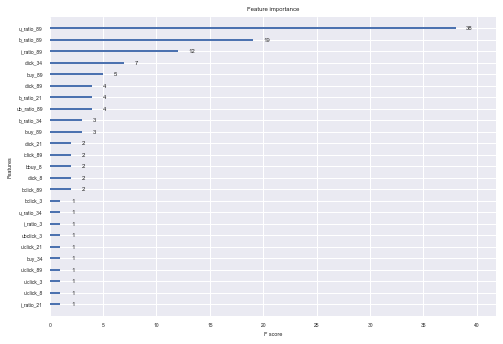

In [13]:
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 0.5)
xgb.plot_importance(model1)

# 第二个模型

In [33]:
sampler = np.random.randint(0,len(train_negative), size = int(len(train_negative)/5))
part_negative = train_negative.take(sampler)
len(part_negative)

1054573

In [34]:
train = pd.concat([train_postive,part_negative,train_postive],axis=0,ignore_index=True)

In [35]:
train_label = train['type']
train = train.drop(['uid', 'spu_id', 'type','date'],axis =1) 

In [36]:
dtrain = xgb.DMatrix(train, train_label)

In [38]:
t0 = time.time()
model2 = xgb.train(params,dtrain,num_boost_round=13)
print time.time() - t0

23.0450000763


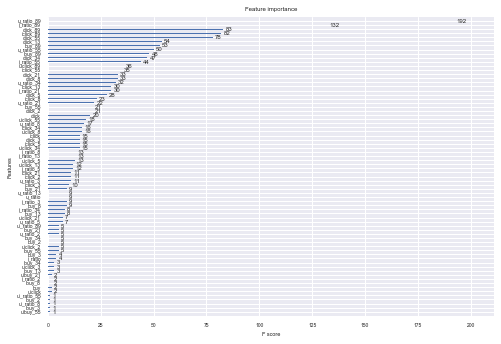

In [39]:
sns.set(font_scale = 0.5)
xgb.plot_importance(model)

# 模型3

In [42]:
sampler = np.random.randint(0,len(train_negative), size = int(len(train_negative)/5))
part_negative = train_negative.take(sampler)
len(part_negative)

1054573

In [43]:
train = pd.concat([train_postive,part_negative,train_postive],axis=0,ignore_index=True)
train_label = train['type']
train = train.drop(['uid', 'spu_id', 'type','date'],axis =1) 
dtrain = xgb.DMatrix(train, train_label)

In [44]:
t0 = time.time()
model3 = xgb.train(params,dtrain,num_boost_round=13)
print time.time() - t0

24.7790000439


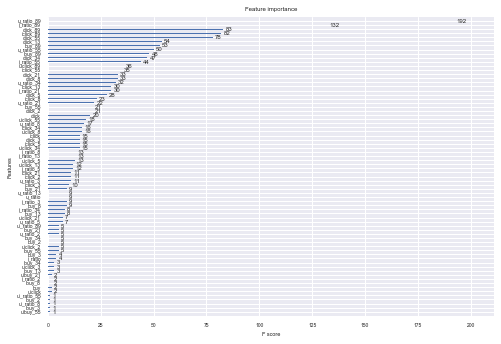

In [45]:
sns.set(font_scale = 0.5)
xgb.plot_importance(model)

In [46]:
sampler = np.random.randint(0,len(train_negative), size = int(len(train_negative)/5))
part_negative = train_negative.take(sampler)
len(part_negative)

1054573

In [47]:
train = pd.concat([train_postive,part_negative,train_postive],axis=0,ignore_index=True)
train_label = train['type']
train = train.drop(['uid', 'spu_id', 'type','date'],axis =1) 
dtrain = xgb.DMatrix(train, train_label)

In [48]:
t0 = time.time()
model4 = xgb.train(params,dtrain,num_boost_round=13)
print time.time() - t0

24.3529999256


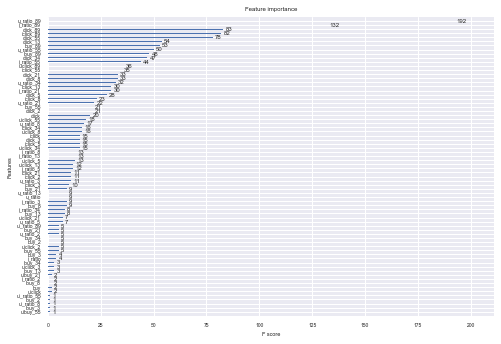

In [49]:
sns.set(font_scale = 0.5)
xgb.plot_importance(model)

In [53]:
sampler = np.random.randint(0,len(train_negative), size = int(len(train_negative)/5))
part_negative = train_negative.take(sampler)
len(part_negative)

1054573

In [54]:
train = pd.concat([train_postive,part_negative,train_postive],axis=0,ignore_index=True)
train_label = train['type']
train = train.drop(['uid', 'spu_id', 'type','date'],axis =1) 
dtrain = xgb.DMatrix(train, train_label)

In [55]:
t0 = time.time()
model5 = xgb.train(params,dtrain,num_boost_round=13)
print time.time() - t0

23.2650001049


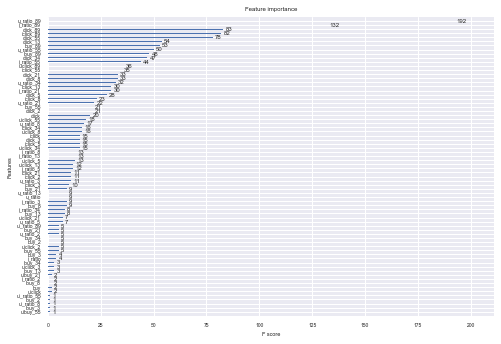

In [56]:
sns.set(font_scale = 0.5)
xgb.plot_importance(model)

# 开始预测

In [14]:
sub = sub.drop(['uid', 'spu_id'],axis=1) 

In [15]:
x_feat = xgb.DMatrix(sub)

In [16]:
p1 = model1.predict(x_feat)
print p1

[ 0.06262468  0.23696475  0.02823382 ...,  0.0630482   0.18348193
  0.03792113]


In [63]:
p2 = model2.predict(x_feat)
print p2

[ 0.10814098  0.1864697   0.03206999 ...,  0.05449316  0.18862797
  0.05207403]


In [64]:
p3 = model3.predict(x_feat)
print p3

[ 0.10271742  0.19789957  0.03181181 ...,  0.04457035  0.19083403
  0.04999873]


In [65]:
p4 = model4.predict(x_feat)
print p4

[ 0.10907139  0.18214524  0.03685917 ...,  0.04944497  0.20798935
  0.05330519]


In [66]:
p5 = model5.predict(x_feat)
print p5

[ 0.10859682  0.20213854  0.03690812 ...,  0.05653548  0.2011985
  0.05416782]


In [67]:
p = np.array(p1) +np.array(p2) ++np.array(p3) +np.array(p4) +np.array(p5)
p = p/5.0

In [68]:
p

array([ 0.10834183,  0.19446343,  0.03470224, ...,  0.05149471,
        0.2009335 ,  0.05323384], dtype=float32)

In [17]:
y_pred = pd.DataFrame(p1)
y_pred.to_csv('./cache/boost_result4.txt',index=False,header=False, float_format='%.3f')

In [19]:
np.where(p1>0.5, 1,0).sum()

63424